In [1]:
from triqs.plot.mpl_interface import *
from triqs.gf import *

# change scale of all figures to make them bigger
import matplotlib as mpl
from h5 import *

import triqs.utility.mpi as mpi

from ctint_tutorial import Solver,Solver2
import numpy as np

Starting run with 1 MPI rank(s) at : 2022-05-19 12:24:20.319792


In [3]:
def fuse_eo(u):
    n = len(u)
    assert n%2==0
    m = n//2
    v = np.zeros(m,dtype=type(u[0]))
    for k in range(m-1):
        v[k] = u[2*k]+u[2*k+1]
    return v

In [132]:
with HDFArchive("data/test_solver2.h5",'r') as A:
    Ns = A['N']
    beta = A['beta']

## Histogram

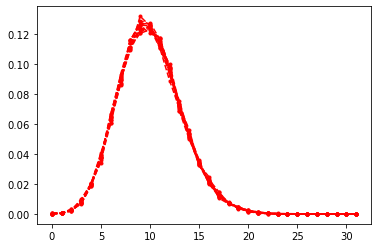

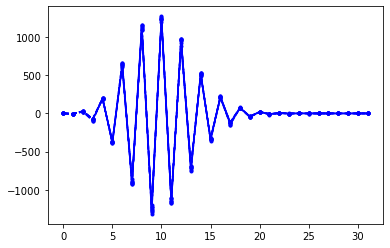

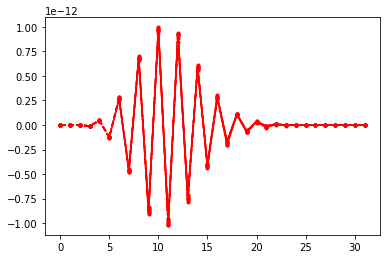

In [133]:
with HDFArchive("data/test_solver.h5",'r') as A:
    for i in range(Ns):
        N = len(A[f'hist_{i}'])
        k = np.arange(N)
        if True:
            plt.plot(k,A[f'hist_{i}'],'r.--')
        else:
            plt.plot(k,A[f'hist_{i}'],'r.')

    plt.show()

    for i in range(Ns):
        N = len(A[f'hist_sign_{i}'])
        k = np.arange(N)
        #print(A[f'hist_sign_{i}'][0:2])
        if A[f'hist_sign_{i}'][0] != 0:
            plt.plot(k,(A[f'hist_sign_{i}']/A[f'hist_sign_{i}'][0]).real,'b.--')
    plt.show()

    for i in range(Ns):
        N = len(A[f'hist_sign_{i}'])
        k = np.arange(N)
        #print(A[f'hist_sign_{i}'][0:2])
        if A[f'hist_sign_{i}'][0] != 0:
            plt.plot(k,(A[f'hist_sign_{i}']/A[f'hist_sign_{i}'][0]).imag,'r.--')
    plt.show()

# of samples: 10


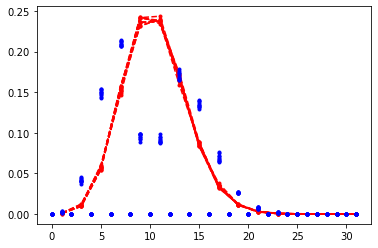

In [134]:
with HDFArchive("data/test_solver.h5",'r') as A:
    for i in range(Ns):
        N = len(A[f'hist_{i}'])
        k = np.arange(N//2)*2+1
        h = fuse_eo(A[f'hist_{i}'][:N-N%2])
        if True:
            plt.plot(k,h,'r.--')
        else:
            plt.plot(k,h,'r.')


    with HDFArchive("data/test_solver2.h5",'r') as B:
        print(f"# of samples: {B['N']}") 
        for i in range(Ns):
            N = len(B[f'hist_{i}'])
            k = np.arange(N)
            plt.plot(k,B[f'hist_{i}'],'b.')

plt.show()

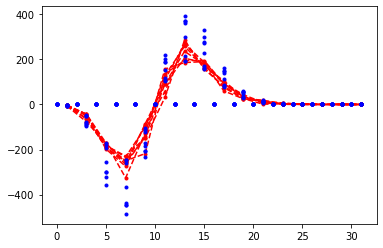

In [135]:
with HDFArchive("data/test_solver.h5",'r') as A:
    for i in range(Ns):
        N = len(A[f'hist_sign_{i}'])
        k = np.arange(N//2)*2+1
        if A[f'hist_sign_{i}'][0] != 0:
            h = fuse_eo(A[f'hist_sign_{i}'][:N-N%2])
            #print(h[0])
            if True:
                plt.plot(k,h.real,'r.--')
            else:
                plt.plot(k,h.real,'r.')

    with HDFArchive("data/test_solver2.h5",'r') as B:
        for i in range(Ns):
            N = len(B[f'hist_sign_{i}'])
            k = np.arange(N)
            if B[f'hist_sign_{i}'][1] != 0 and A[f'hist_sign_{i}'][0] != 0:
                h = B[f'hist_sign_{i}']/B[f'hist_sign_{i}'][1] * (1+A[f'hist_sign_{i}'][1])
                #print(h[1])
                plt.plot(k,h.real,'b.')
plt.show()

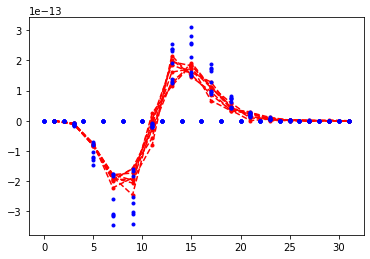

In [136]:
with HDFArchive("data/test_solver.h5",'r') as A:
    for i in range(Ns):
        N = len(A[f'hist_sign_{i}'])
        k = np.arange(N//2)*2+1
        h = fuse_eo(A[f'hist_sign_{i}'][:N-N%2])
        if True:
            plt.plot(k,h.imag,'r.--')
        else:
            plt.plot(k,h.imag,'r.')

    with HDFArchive("data/test_solver2.h5",'r') as B:
        for i in range(B[f'N']):
            N = len(B[f'hist_sign_{i}'])
            k = np.arange(N)
            h = B[f'hist_sign_{i}']/B[f'hist_sign_{i}'][1] * (1+A[f'hist_sign_{i}'][1])
            plt.plot(k,h.imag,'b.')

plt.show()

## Double Occupancy

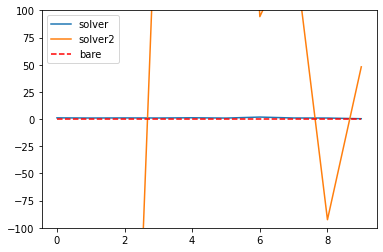

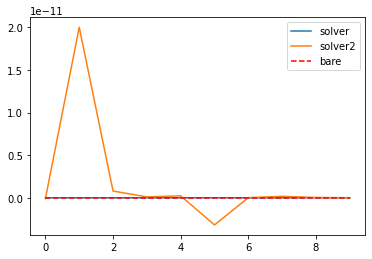

In [143]:
with HDFArchive("data/test_solver.h5",'r') as A:
    with HDFArchive("data/test_solver2.h5",'r') as B:
        k = np.arange(Ns)
        d = np.zeros(Ns,dtype=complex)
        d2 = np.zeros(Ns,dtype=complex)
        d0 = np.zeros(Ns,dtype=complex)
        for i in range(Ns):
            d[i] = A[f"d_{i}"]
            d2[i] = B[f"d_{i}"]
            d0[i] = B[f"d0_{i}"]


plt.plot(k,d.real,label="solver")
plt.plot(k,d2.real,label="solver2")
plt.plot(k,d0.real,'r--',label="bare")
plt.legend()
plt.ylim(-100,100)
plt.show()

plt.plot(k,d.imag,label="solver")
plt.plot(k,d2.imag,label="solver2")
plt.plot(k,d0.imag,'r--',label="bare")
plt.legend()
plt.show()

## GF

In [138]:
Nom = 10 # # of Matsubara frquencies
xm = (2*Nom+1)*np.pi/beta

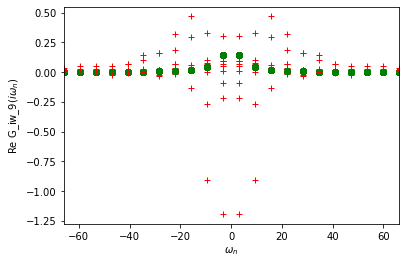

In [139]:
with HDFArchive("data/test_solver.h5",'r') as A:
    for i in range(Ns):
        oplot(A[f'G0_iw_{i}'].real, 'go')
        oplot(A[f'G_iw_{i}'].real, 'r+')

plt.legend().remove()
plt.xlim(-xm,xm)
plt.show()

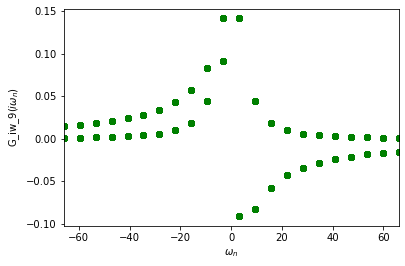

In [140]:
with HDFArchive("data/test_solver2.h5",'r') as A:
    for i in range(Ns):
        oplot(A[f'G0_iw_{i}'], 'go')
        oplot(A[f'G_iw_{i}'], 'r+')
        
plt.legend().remove()
plt.xlim(-xm,xm)
plt.show()

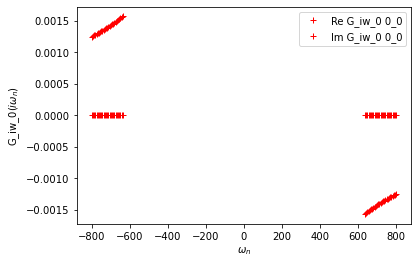

In [141]:
with HDFArchive("data/test_solver2.h5",'r') as A:
    oplot(A[f'G_iw_0'], 'r+')
        

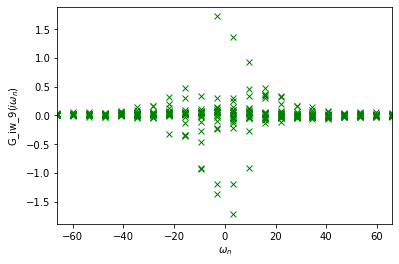

In [142]:
with HDFArchive("data/test_solver.h5",'r') as A:
    with HDFArchive("data/test_solver2.h5",'r') as B:
        for i in range(B[f'N']):
            oplot(A[f'G_iw_{i}'], 'gx')
            oplot(B[f'G_iw_{i}'], 'r+')

plt.xlim(-xm,xm)
plt.legend().remove()
plt.show()